In [1]:
# Importing required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import IsolationForest


In [ ]:
# load the dataset
df=pd.read_csv('Network Traffic.csv')

In [3]:
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [5]:
df.describe()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.00000
mean,0.502446,0.512259,32024.617000,199.769000,0.506857,0.0,0.495222,0.485651,0.10000
std,0.289606,0.281130,18520.890349,180.078488,0.303271,0.0,0.292927,0.295953,0.30015
min,0.000000,0.000000,1038.000000,53.000000,0.000000,0.0,0.000000,0.000000,0.00000
25%,0.256263,0.275909,16245.250000,53.000000,0.267857,0.0,0.236912,0.228039,0.00000
50%,0.499642,0.515971,31883.000000,80.000000,0.500000,0.0,0.504290,0.467905,0.00000
75%,0.741410,0.746523,47746.250000,443.000000,0.785714,0.0,0.761556,0.750876,0.00000
max,1.000000,1.000000,65484.000000,443.000000,1.000000,0.0,1.000000,1.000000,1.00000


In [ ]:
# check for missing values
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

### Step 2: Data Preprocessing

In [9]:
# drop the label column 
features=df.drop('label', axis=1)
features.head() 

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,True,False,False,True,False,False,False,True,False


In [15]:
# if columns is bool type then convert it into int type
for col in features.columns:
    if features[col].dtype == 'bool':
        features[col] = features[col].astype(int)

In [16]:
features.dtypes

packet_size              float64
inter_arrival_time       float64
src_port                   int64
dst_port                   int64
packet_count_5s          float64
mean_packet_size         float64
spectral_entropy         float64
frequency_band_energy    float64
protocol_type_TCP          int64
protocol_type_UDP          int64
src_ip_192.168.1.2         int64
src_ip_192.168.1.3         int64
dst_ip_192.168.1.5         int64
dst_ip_192.168.1.6         int64
tcp_flags_FIN              int64
tcp_flags_SYN              int64
tcp_flags_SYN-ACK          int64
dtype: object

### Feature Engineering

In [17]:
# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# convert the scaled fetures into a dataframe
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [20]:
# parameters for isolation forest
n_estimators=100 
contamination=0.04 
sample_size=256

In [21]:
# train the isolation forest model
model=IsolationForest(n_estimators=n_estimators, contamination=contamination, max_samples=sample_size, random_state=42)
model.fit(scaled_features_df)
anomaly_labels=model.predict(scaled_features_df)
# connvert the anomaly labels into binary (1 for normal and -1 for anomaly)
# add the anomoly labels to the original dataframe
scaled_features_df['anomaly']=anomaly_labels

In [22]:
# values counts of the anamoly labels
scaled_features_df['anomaly'].value_counts()

anomaly
 1    960
-1     40
Name: count, dtype: int64

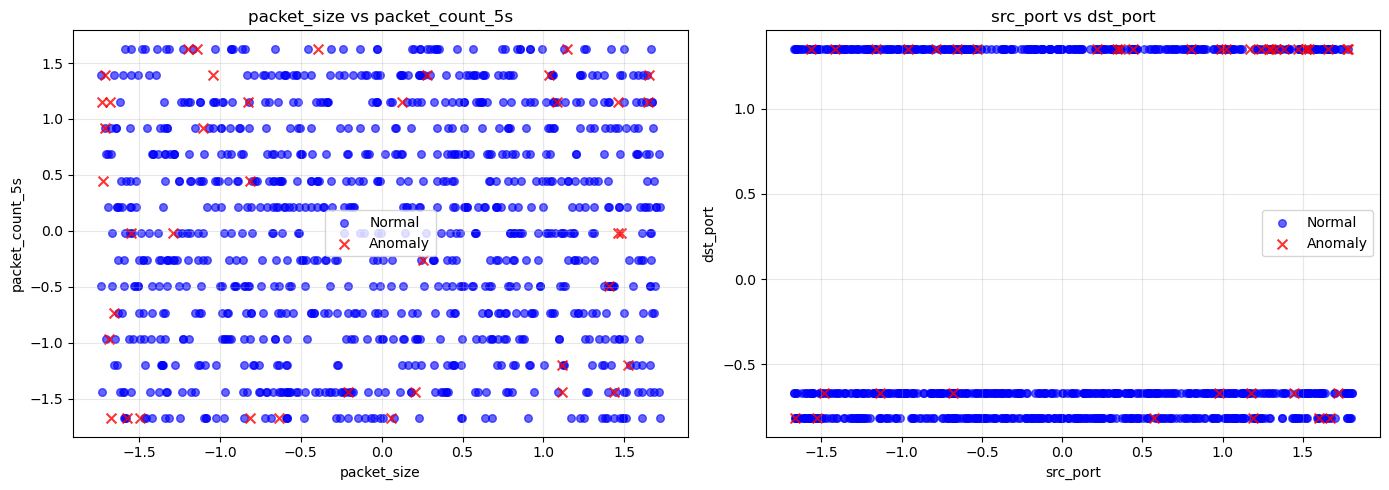

Normal data points: 960
Anomalies detected: 40


In [24]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
normal = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomaly = scaled_features_df[scaled_features_df['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0].scatter(normal['packet_size'], normal['packet_count_5s'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['packet_size'], anomaly['packet_count_5s'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('packet_size')
axes[0].set_ylabel('packet_count_5s')
axes[0].set_title('packet_size vs packet_count_5s')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[1].scatter(normal['src_port'], normal['dst_port'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['src_port'], anomaly['dst_port'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('src_port')
axes[1].set_ylabel('dst_port')
axes[1].set_title('src_port vs dst_port')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")
 


In [25]:
import joblib
joblib.dump(model, 'anomaly.pkl')

['anomaly.pkl']